In [241]:
import numpy as np
import pandas as pd

In [242]:
pd.set_option('display.max_rows', None)
raw_data = pd.read_csv('lme_train.csv')

In [243]:
raw_data=raw_data.drop(0,axis=0)

In [244]:
header_list = ['index','date','LME_Aluminium', 'LME_stock', 'LME_copper', 'LME_zinc', 'coal']

In [245]:
raw_data.to_csv("Train_lme2.csv",header=header_list, index=False)

In [246]:
raw_data = pd.read_csv('Train_LME2.csv')

In [247]:
raw_data['LME_Aluminium'] = raw_data['LME_Aluminium'].str.replace(',','')
raw_data['LME_stock'] = raw_data['LME_stock'].str.replace(',','')
raw_data['LME_copper'] = raw_data['LME_copper'].str.replace(',','')
raw_data['LME_zinc'] = raw_data['LME_zinc'].str.replace(',','')
raw_data['LME_Aluminium'] = raw_data['LME_Aluminium'].str.replace('-','NaN')
raw_data['LME_stock'] = raw_data['LME_stock'].str.replace('-','NaN')
raw_data['LME_copper'] = raw_data['LME_copper'].str.replace('-','NaN')
raw_data['LME_zinc'] = raw_data['LME_zinc'].str.replace('-','NaN')


In [248]:
raw_data = raw_data.drop(['index','date'],axis=1)

In [249]:
raw_data.isnull().sum()

LME_Aluminium     1
LME_stock         1
LME_copper        1
LME_zinc          1
coal             40
dtype: int64

In [250]:
missing_values=raw_data[raw_data['coal'].isnull()].index.to_list()

In [251]:
raw_data = raw_data.dropna()
raw_data = raw_data.reset_index(drop=True)

In [252]:
raw_data.dtypes

LME_Aluminium     object
LME_stock         object
LME_copper        object
LME_zinc          object
coal             float64
dtype: object

In [299]:
raw_data = raw_data.astype('float')

In [300]:
raw_data=raw_data.dropna()
raw_data.isnull().sum()

LME_Aluminium    0
LME_stock        0
LME_copper       0
LME_zinc         0
coal             0
dtype: int64

In [301]:
from sklearn.preprocessing import MinMaxScaler

In [322]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(raw_data)
scaled_data.shape                      

(1709, 5)

In [323]:
scaled_data= scaled_data.reshape(1709,5)
scaled_data

array([[0.37670698, 0.08794037, 0.60557676, 0.49423046, 0.4918862 ],
       [0.35895435, 0.08867712, 0.58026326, 0.48837965, 0.49167545],
       [0.34880999, 0.08888761, 0.56943687, 0.47407769, 0.5028451 ],
       ...,
       [0.02126414, 0.99494805, 0.02741647, 0.00812612, 0.90727081],
       [0.01307062, 0.99720612, 0.03170029, 0.00763855, 0.92581665],
       [0.01385096, 0.99942591, 0.04509697, 0.01999025, 0.94204426]])

# Create a datastructure with 60 timesteps and 1 output (Many to one LSTM)

In [324]:
x_train = []
y_train = []
for i in range(60,1709):
    x_train.append(scaled_data[i-60:i , 0:5])
    y_train.append(scaled_data[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)

In [325]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 5))

In [326]:
x_train.shape
y_train.shape

(1649,)

In [327]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [328]:
regressor = Sequential()

In [329]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],5)))
regressor.add(Dropout(0.2))

In [330]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [331]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [332]:
regressor.add(Dense(units=1))

In [333]:
regressor.compile(optimizer = 'adam', loss= 'mean_squared_error')
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
52/52 [==============================] - 12s 105ms/step - loss: 0.0094
Epoch 2/100
52/52 [==============================] - 5s 97ms/step - loss: 0.0031
Epoch 3/100
52/52 [==============================] - 5s 95ms/step - loss: 0.0022
Epoch 4/100
52/52 [==============================] - 5s 98ms/step - loss: 0.0022
Epoch 5/100
52/52 [==============================] - 5s 95ms/step - loss: 0.0021
Epoch 6/100
52/52 [==============================] - 5s 93ms/step - loss: 0.0019
Epoch 7/100
52/52 [==============================] - 5s 94ms/step - loss: 0.0019
Epoch 8/100
52/52 [==============================] - 6s 111ms/step - loss: 0.0016
Epoch 9/100
52/52 [==============================] - 5s 101ms/step - loss: 0.0018
Epoch 10/100
52/52 [==============================] - 5s 99ms/step - loss: 0.0017
Epoch 11/100
52/52 [==============================] - 5s 96ms/step - loss: 0.0015
Epoch 12/100
52/52 [==============================] - 5s 94ms/step - loss: 0.0015
Epoch 13/100
52/52 [=

In [334]:
test_data = pd.read_csv('test_lme.csv')
test_data = test_data.drop(0,axis=0)

In [335]:
test_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1,NaN,22. December 2022,"2,362.00","473,000","8,345.50","3,008.00",222.70
2,NaN,21. December 2022,"2,357.00","481,175","8,327.00","3,065.50",223.85
3,NaN,20. December 2022,"2,329.50","478,500","8,302.00","3,075.00",226.10
4,NaN,19. December 2022,"2,327.00","479,525","8,331.00","3,060.00",227.30
5,NaN,16. December 2022,"2,354.00","477,650","8,231.50","3,127.00",224.65
6,NaN,15. December 2022,"2,396.00","483,850","8,383.00","3,235.00",228.20
7,NaN,14. December 2022,"2,379.50","489,300","8,415.00","3,277.00",232.15
8,NaN,13. December 2022,"2,388.00","496,425","8,381.00","3,289.00",231.55
9,NaN,12. December 2022,"2,390.00","501,675","8,371.50","3,284.00",232.40
10,NaN,09. December 2022,"2,453.50","471,575","8,490.50","3,247.00",228.85


In [336]:
test_data.to_csv("test_lme2.csv",header=header_list, index=False)

In [337]:
test_data = pd.read_csv('test_lme2.csv')

In [338]:
test_data.isnull().sum()

index            20
date              4
LME_Aluminium     4
LME_stock         4
LME_copper        4
LME_zinc          4
coal              4
dtype: int64

In [339]:
test_data=test_data.drop(['index','date'], axis = 1)
test_data

,LME_Aluminium,LME_stock,LME_copper,LME_zinc,coal
0,"2,362.00","473,000","8,345.50","3,008.00",222.70
1,"2,357.00","481,175","8,327.00","3,065.50",223.85
2,"2,329.50","478,500","8,302.00","3,075.00",226.10
3,"2,327.00","479,525","8,331.00","3,060.00",227.30
4,"2,354.00","477,650","8,231.50","3,127.00",224.65
5,"2,396.00","483,850","8,383.00","3,235.00",228.20
6,"2,379.50","489,300","8,415.00","3,277.00",232.15
7,"2,388.00","496,425","8,381.00","3,289.00",231.55
8,"2,390.00","501,675","8,371.50","3,284.00",232.40
9,"2,453.50","471,575","8,490.50","3,247.00",228.85


In [340]:
test_data = test_data.dropna()

In [341]:
test_data

,LME_Aluminium,LME_stock,LME_copper,LME_zinc,coal
0,"2,362.00","473,000","8,345.50","3,008.00",222.70
1,"2,357.00","481,175","8,327.00","3,065.50",223.85
2,"2,329.50","478,500","8,302.00","3,075.00",226.10
3,"2,327.00","479,525","8,331.00","3,060.00",227.30
4,"2,354.00","477,650","8,231.50","3,127.00",224.65
5,"2,396.00","483,850","8,383.00","3,235.00",228.20
6,"2,379.50","489,300","8,415.00","3,277.00",232.15
7,"2,388.00","496,425","8,381.00","3,289.00",231.55
8,"2,390.00","501,675","8,371.50","3,284.00",232.40
9,"2,453.50","471,575","8,490.50","3,247.00",228.85


In [342]:
test_data['LME_Aluminium'] = test_data['LME_Aluminium'].str.replace(',','')
test_data['LME_stock'] = test_data['LME_stock'].str.replace(',','')
test_data['LME_copper'] = test_data['LME_copper'].str.replace(',','')
test_data['LME_zinc'] = test_data['LME_zinc'].str.replace(',','')
test_data['LME_Aluminium'] = test_data['LME_Aluminium'].str.replace('-','NaN')
test_data['LME_stock'] = test_data['LME_stock'].str.replace('-','NaN')
test_data['LME_copper'] = test_data['LME_copper'].str.replace('-','NaN')
test_data['LME_zinc'] = test_data['LME_zinc'].str.replace('-','NaN')
test_data

/Users/paras/.conda/envs/py3-TF2.0/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/paras/.conda/envs/py3-TF2.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/paras/.conda/envs/py3-TF2.0/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,LME_Aluminium,LME_stock,LME_copper,LME_zinc,coal
0,2362.00,473000,8345.50,3008.00,222.70
1,2357.00,481175,8327.00,3065.50,223.85
2,2329.50,478500,8302.00,3075.00,226.10
3,2327.00,479525,8331.00,3060.00,227.30
4,2354.00,477650,8231.50,3127.00,224.65
5,2396.00,483850,8383.00,3235.00,228.20
6,2379.50,489300,8415.00,3277.00,232.15
7,2388.00,496425,8381.00,3289.00,231.55
8,2390.00,501675,8371.50,3284.00,232.40
9,2453.50,471575,8490.50,3247.00,228.85


In [343]:
test_data = test_data.astype('float')

In [278]:
dataset_total = pd.concat([raw_data,test_data],axis=0)

In [344]:
inputs = dataset_total[len(dataset_total)-len(test_data)-60:]

In [345]:
test_scaled = scaler.transform(inputs)

In [347]:
x_test = []
for i in range(60,76):
    x_test.append(test_scaled[i-60:i , 0:5])
x_test= np.array(x_test)

In [348]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 5))

In [349]:
x_test.shape

(16, 60, 5)

In [350]:
predicted_LME_price = regressor.predict(x_test)

In [351]:
predicted_LME_price

array([[0.04149848],
       [0.1343568 ],
       [0.27234653],
       [0.36598766],
       [0.39351642],
       [0.38314396],
       [0.36555445],
       [0.35023764],
       [0.34119698],
       [0.33864313],
       [0.3465197 ],
       [0.36021623],
       [0.36963552],
       [0.3771219 ],
       [0.3849063 ],
       [0.38740796]], dtype=float32)

In [352]:
test = np.zeros([16,4])
predicted_LME_price = np.concatenate((predicted_LME_price, test), axis = 1)

In [353]:
predicted_LME_price = scaler.inverse_transform(predicted_LME_price)

In [354]:
predicted_LME_price

array([[1.52786061e+03, 2.71450000e+05, 4.31050000e+03, 1.45350000e+03,
        1.10550000e+02],
       [1.76585647e+03, 2.71450000e+05, 4.31050000e+03, 1.45350000e+03,
        1.10550000e+02],
       [2.11952415e+03, 2.71450000e+05, 4.31050000e+03, 1.45350000e+03,
        1.10550000e+02],
       [2.35952637e+03, 2.71450000e+05, 4.31050000e+03, 1.45350000e+03,
        1.10550000e+02],
       [2.43008259e+03, 2.71450000e+05, 4.31050000e+03, 1.45350000e+03,
        1.10550000e+02],
       [2.40349797e+03, 2.71450000e+05, 4.31050000e+03, 1.45350000e+03,
        1.10550000e+02],
       [2.35841606e+03, 2.71450000e+05, 4.31050000e+03, 1.45350000e+03,
        1.10550000e+02],
       [2.31915907e+03, 2.71450000e+05, 4.31050000e+03, 1.45350000e+03,
        1.10550000e+02],
       [2.29598787e+03, 2.71450000e+05, 4.31050000e+03, 1.45350000e+03,
        1.10550000e+02],
       [2.28944235e+03, 2.71450000e+05, 4.31050000e+03, 1.45350000e+03,
        1.10550000e+02],
       [2.30963001e+03, 2.7145

In [355]:
predicted_LME_price = predicted_LME_price[:,:1]

In [356]:
predicted_LME_price

array([[1527.86060995],
       [1765.85647005],
       [2119.52414712],
       [2359.52636874],
       [2430.08258784],
       [2403.49797314],
       [2358.41606033],
       [2319.15906557],
       [2295.98787013],
       [2289.44235152],
       [2309.63001323],
       [2344.73419788],
       [2368.87584382],
       [2388.0634183 ],
       [2408.0148263 ],
       [2414.42659765]])

In [361]:
LME_real = test_data.iloc[:,:1]

In [362]:
LME_real

,LME_Aluminium
0,2362.0
1,2357.0
2,2329.5
3,2327.0
4,2354.0
5,2396.0
6,2379.5
7,2388.0
8,2390.0
9,2453.5


In [365]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 3.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 4.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 1.1 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 5.6 MB/s eta 0:00:0000:0100:01


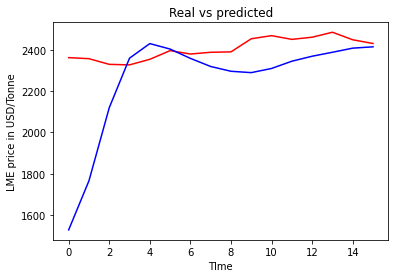

In [366]:
import matplotlib.pyplot as plt
plt.plot(LME_real, color='red', label = 'Real_LME')
plt.plot(predicted_LME_price, color='blue', label = 'Predicted_LME')
plt.title("Real vs predicted")
plt.xlabel('TIme')
plt.ylabel('LME price in USD/Tonne')
plt.legend
plt.show()